In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

np.random.seed(42)

In [9]:
def compute_clustering_coef(n, p):
    G = nx.erdos_renyi_graph(n, p)
    avg_clustering = nx.average_clustering(G)
    return avg_clustering

def repeat(iter, n, p):
    results = []
    for i in range(iter):
        cl_coef = compute_clustering_coef(n, p)
        results.append(cl_coef)
    mean_coef = np.mean(results)
    return mean_coef

## Task 2

In [11]:
# simulation - creating graphs, computing average C and comparing it with p

iter = 100
n = 100

for p in [0.1, 0.3, 0.5]:
    mean_c = repeat(iter, n, p)
    print(f"Mean C={mean_c}, p={p}")

Mean C=0.09973456079378507, p=0.1
Mean C=0.3002650882048823, p=0.3
Mean C=0.4998101464459401, p=0.5


## Task 3

In [34]:
communities = [20, 20, 20, 20]
p_in = 0.4
p_out = 0.05

D = np.diag([1, 1, 1, 1])
P = (np.ones((4, 4)) - D) * p_out + D * p_in
P

array([[0.4 , 0.05, 0.05, 0.05],
       [0.05, 0.4 , 0.05, 0.05],
       [0.05, 0.05, 0.4 , 0.05],
       [0.05, 0.05, 0.05, 0.4 ]])

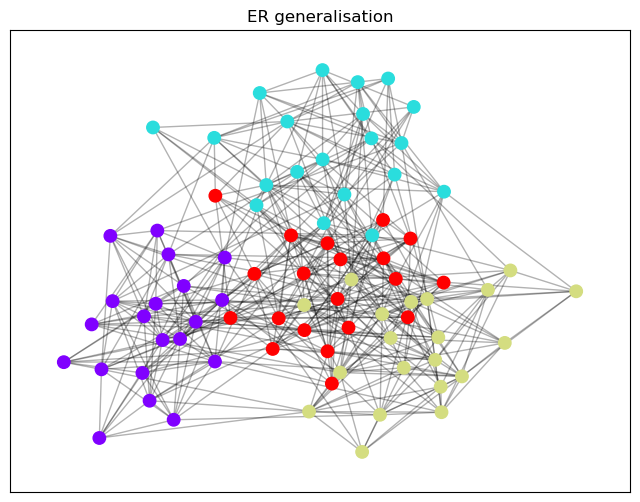

In [35]:
G = nx.stochastic_block_model(communities, P)

colors = []
for i, size in enumerate(communities):
    colors += [i] * size

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.colormaps["rainbow"], node_size=80)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("ER generalisation")
plt.show()

# difference between p_in and p_out influences the separation
# p_in - cluster density
# p_out - cluster identification

## Task 4

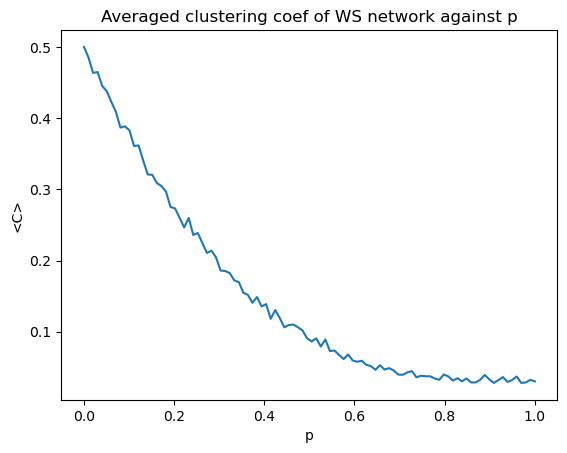

In [53]:
p_list = np.linspace(0, 1, 100)
rep = 20
n = 100
k = 4

c_values = []
for p in p_list:
    c_avg = 0
    for r in range(rep):
        G = nx.watts_strogatz_graph(n, k, p)
        c = nx.average_clustering(G)
        c_avg += c
    c_avg /= rep
    c_values.append(c_avg)

plt.plot(p_list, c_values)
plt.xlabel("p")
plt.ylabel("<C>")
plt.title("Averaged clustering coef of WS network against p")
plt.show()

## Task 5

In [231]:
# random - problem with multi-edges
# def configuration_model1(degrees):
#     n = len(degrees)
#     G = nx.empty_graph(n)
#     
#     active_degrees = np.copy(degrees)
#     active_vertices = list(range(n))
#     
#     while len(active_vertices) > 1:
#         # randomly selecting 2 different vertices (prob proportional to the remaining degree)
#         active_degrees_norm = active_degrees / np.sum(active_degrees)
#         u, v = np.random.choice(active_vertices, 2, replace=False, p=active_degrees_norm)
#         G.add_edge(u, v)
#         
#         i = np.argwhere(active_vertices == u)[0][0]
#         j = np.argwhere(active_vertices == v)[0][0]
#         
#         i, j = (i, j) if i > j else (j, i)
#         
#         active_degrees[i] -= 1
#         active_degrees[j] -= 1
#         
#         # updating active lists
#         if active_degrees[i] == 0:
#             active_degrees = np.delete(active_degrees, i)
#             active_vertices = np.delete(active_vertices, i)
#         if active_degrees[j] == 0:
#             active_degrees = np.delete(active_degrees, j)
#             active_vertices = np.delete(active_vertices, j)
#             
#     if len(active_vertices) > 0:
#         return G, False
#     
#     return G, True            

# Havel-Hakimi greedy
def configuration_model(degrees):
    n = len(degrees)
    G = nx.empty_graph(n)
    
    # decreasing order of degrees
    sorted_degrees = np.sort(degrees)[::-1]
    
    # ignoring zero-degree vertices
    sorted_degrees = sorted_degrees[sorted_degrees > 0]
    
    vertices = np.arange(len(sorted_degrees))
    
    while len(vertices) > 0:
        deg = sorted_degrees[0]
        
        # we require at least deg other vertices
        if len(sorted_degrees) - 1 < deg:
            return G, False
        
        # adding edges
        u = vertices[0]
        sorted_degrees[0] = 0
        for i in range(deg):
            v = vertices[i+1]
            G.add_edge(u, v)
            # decreasing degree
            sorted_degrees[i+1] -= 1
            
        # removing current vertex
        zero_idx = np.where(sorted_degrees == 0)
        vertices = np.delete(vertices, zero_idx)
        sorted_degrees = np.delete(sorted_degrees, zero_idx)
        
        # resorting arrays
        idx_sort = np.argsort(sorted_degrees)[::-1]
        sorted_degrees = sorted_degrees[idx_sort]
        vertices = vertices[idx_sort]
        
    return G, True

In [232]:
degrees = [0, 0, 0]
G, success = configuration_model(degrees)
print(f"degrees: {degrees}, converged: {success}")

degrees = [1]
G, success = configuration_model(degrees)
print(f"degrees: {degrees}, converged: {success}")

degrees = [1, 1]
G, success = configuration_model(degrees)
print(f"degrees: {degrees}, converged: {success}")

degrees = [1, 1, 2]
G, success = configuration_model(degrees)
print(f"degrees: {degrees}, converged: {success}")

degrees = [2, 2, 2]
G, success = configuration_model(degrees)
print(f"degrees: {degrees}, converged: {success}")

degrees = [3, 2, 2, 1]
G, success = configuration_model(degrees)
print(f"degrees: {degrees}, converged: {success}")

degrees = [3, 3, 2, 2]
G, success = configuration_model(degrees)
print(f"degrees: {degrees}, converged: {success}")

degrees = [1, 1, 2, 2, 2]
G, success = configuration_model(degrees)
print(f"degrees: {degrees}, converged: {success}")

degrees = [3, 3, 2, 2, 1] # odd sum of degrees
G, success = configuration_model(degrees)
print(f"degrees: {degrees}, converged: {success}")

degrees = [3, 3, 2, 2, 2]
G, success = configuration_model(degrees)
print(f"degrees: {degrees}, converged: {success}")

degrees: [0, 0, 0], converged: True
degrees: [1], converged: False
degrees: [1, 1], converged: True
degrees: [1, 1, 2], converged: True
degrees: [2, 2, 2], converged: True
degrees: [3, 2, 2, 1], converged: True
degrees: [3, 3, 2, 2], converged: True
degrees: [1, 1, 2, 2, 2], converged: True
degrees: [3, 3, 2, 2, 1], converged: False
degrees: [3, 3, 2, 2, 2], converged: True
